In [1]:
import seaborn as sns


In [31]:
from parse_touchpad_data import TouchpadData
from sklearn.mixture import BayesianGaussianMixture

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

legal = np.array(TouchpadData('../touchpad_capture/real_data/legal').data)
illegal = np.array(TouchpadData('../touchpad_capture/real_data/illegal').data)
nontouch = np.array(TouchpadData('../touchpad_capture/real_data/nontouches').data)


legal_features = pd.DataFrame({
    'vars': np.var(legal, axis=(1,2)), 
    #'means': np.mean(legal, axis=(1,2)), 
    'max_values': np.max(legal, axis=(1,2))
    })

illegal_features = pd.DataFrame({
    'vars': np.var(illegal, axis=(1,2)), 
    #'means': np.mean(illegal, axis=(1,2)), 
    'max_values': np.max(illegal, axis=(1,2))
    })

nontouch_features = pd.DataFrame({
    'vars': np.var(nontouch, axis=(1,2)), 
    #'means': np.mean(nontouch, axis=(1,2)), 
    'max_values': np.max(nontouch, axis=(1,2))
    })


bgm = BayesianGaussianMixture().fit(nontouch_features)

legal_scores = pd.Series(bgm.score_samples(legal_features))
illegal_scores = pd.Series(bgm.score_samples(illegal_features))

start = -300
end = -150

legal_scores = legal_scores[legal_scores < -200]

legal_scores

1136   -218.346386
1164   -225.066001
dtype: float64

In [3]:
-4556.850819 > start

False

In [32]:
for index in legal_scores.index:
    plt.imsave('out/{}.png'.format(index), legal[index], cmap='gist_heat', vmin=-10, vmax=245)


-225.06600051806728

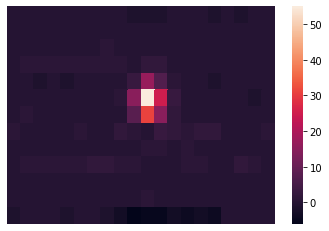

In [38]:
sns.heatmap(legal[1164], xticklabels=False, yticklabels=False)
legal_scores[1164]

-105.5162655095892

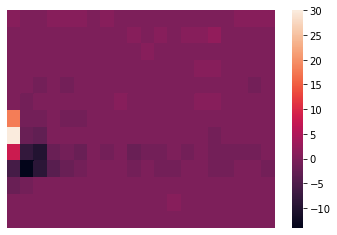

In [44]:
sns.heatmap(legal[1], xticklabels=False, yticklabels=False)
legal_scores[1]

-4.2259882470955805

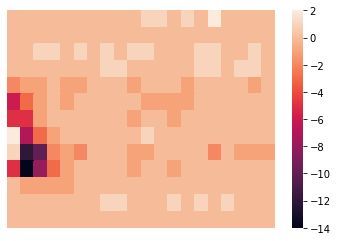

In [25]:
sns.heatmap(legal[2], xticklabels=False, yticklabels=False)
legal_scores[2]